## Load in packages and modified FROMAGe

In [1]:
%cd ..

/home/nils/NILS/Master/DL2/DL2-ZeroVis


In [2]:
from src.fromage_inf.inf_utils import PromptParser

In [3]:
# def trunc_caption(caption: str) -> str:
#     # Truncate at period.
#     trunc_index = caption.find('.') + 1
#     if trunc_index < 0:
#         trunc_index = caption.find('\n') + 1
#     caption = caption[:trunc_index]
#     return caption

# def display_interleaved_outputs(model_outputs, one_img_per_ret=True):
#     for output in model_outputs:
#         if type(output) == str:
#             print(output)
#         elif type(output) == list:
#             # Use this to display the single prompt image
#             if one_img_per_ret:
#                 image = Image.open("../benchmark/" + output[0] + ".jpg")
#                 image = image.resize((224, 224))
#                 image = image.convert('RGB')
#                 display(image)
#             # Use this to display the RET image/s
#             else:
#                 fig, ax = plt.subplots(1, len(output), figsize=(3 * len(output), 3))
#                 for i, (img, k) in enumerate(output):
#                     image = np.array(img)
#                     ax[i].imshow(img)
#                     ax[i].set_title(f'Retrieval #{i+1} - K #{k+1}')
#                 plt.show()

In [3]:
# # Load model used in the paper.
# model_dir = '../src/fromage_inf/fromage_model/'
# model = models.load_fromage(model_dir)

parser = PromptParser("src/fromage_inf/fromage_model/")

Using facebook/opt-6.7b for the language model.
Freezing the LM.
Initializing embedding for the retrieval token [RET] (id = 50266).


In [4]:
model = parser.model
relations = model.visual_embs

# Visual arithmetics

### The W2V approach

tensor([[[-4.0938, -2.7344, -0.3359,  ...,  0.2344,  2.3281, -0.2109]]],
       device='cuda:0', dtype=torch.bfloat16)
Prompt:
[RET]
Model generated outputs:


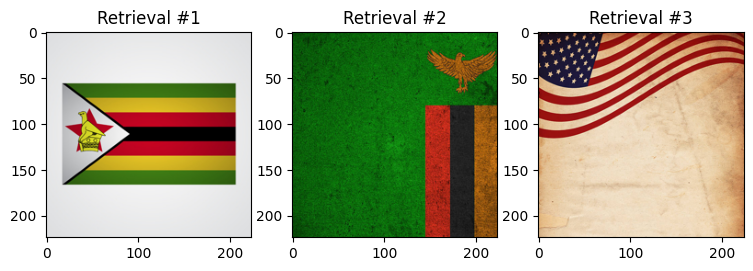

In [5]:
# Do visual arithmetics on the embeddings of the images. Like in ZeroCap
inp_image = (model.visual_embs["countries/japan"] - model.visual_embs["food/sushi"]) + model.visual_embs["food/pizza"]
print(inp_image)
prompt = [inp_image, "[RET]"]

# print('Prompt:')
# display_interleaved_outputs(prompt)
# print('=' * 30)
# model_outputs = model.generate_for_images_and_texts(prompt, max_img_per_ret=3)

print('Prompt:')
parser.display(prompt)
print('=' * 30)
model_outputs = model.generate_for_images_and_texts(prompt, max_img_per_ret=3)

# # Display outputs.
# print('Model generated outputs:')
# display_interleaved_outputs(model_outputs, one_img_per_ret=False)

print('Model generated outputs:')
parser.display(model_outputs)

### Zero-shot no CoT

Prompt:
Task instruction: Perform the visual arithmetic [1,1,-1] on the following three images and predict the output image. Image:
Answer: [RET]
Model generated outputs:


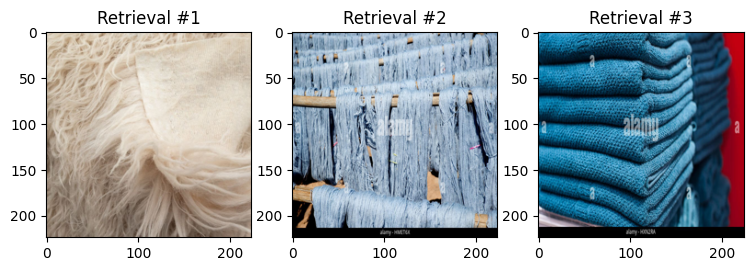

In [6]:
prompt = ["Task instruction: Perform the visual arithmetic [1,1,-1] on the following three images and predict the output image. Image:", model.visual_embs["CEOs/mark_zuckerberg"], model.visual_embs["companies/microsoft"], model.visual_embs["CEOs/bill_gates"], "Answer: [RET]"]

# print('Prompt:')
# display_interleaved_outputs(prompt)
# print('=' * 30)
# model_outputs = model.generate_for_images_and_texts(prompt, max_img_per_ret=3)

print('Prompt:')
parser.display(prompt)
print('=' * 30)
model_outputs = model.generate_for_images_and_texts(prompt, max_img_per_ret=3)


# Display outputs.
# print('Model generated outputs:')
# display_interleaved_outputs(model_outputs, one_img_per_ret=False)
print('Model generated outputs:')
parser.display(model_outputs)

### Zero-shot CoT

### Few-shot CoT

# Multi-modal visual arithmetics

### The W2V approach

### Zero-shot no CoT

### Zero-shot CoT

### Few-shot CoT

# Ablation study

### T-SNE

In [7]:
import torch

In [8]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
X = None
y = []

for key, emb in model.visual_embs.items():
    if type(X) == torch.Tensor:
        X = torch.vstack((X, emb))
    else:
        X = emb
    y.append(key.split('/')[0])

X = torch.tensor(X, dtype=torch.float16)
X = torch.squeeze(X)
X = X.detach().cpu().numpy()

X.shape
print(y)

['countries', 'countries', 'countries', 'countries', 'countries', 'countries', 'countries', 'countries', 'food', 'food', 'food', 'cities', 'cities', 'cities', 'cities', 'cities', 'cities', 'cities', 'cities', 'cities', 'cities', 'cities', 'cities', 'cities', 'leaders', 'leaders', 'leaders', 'leaders', 'leaders', 'leaders', 'leaders', 'leaders', 'leaders', 'leaders', 'building', 'building', 'building', 'building', 'building', 'building', 'building', 'building', 'building', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'flags', 'companies', 'companies', 'companies', 'companies', 'companies', 'CEOs', 'CEOs', 'CEOs', 'CEOs', 'CEOs']


/tmp/ipykernel_19419/1561723609.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float16)


[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 74 / 74
[t-SNE] Mean sigma: 39.526697
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.917302
[t-SNE] KL divergence after 275 iterations: 0.177454


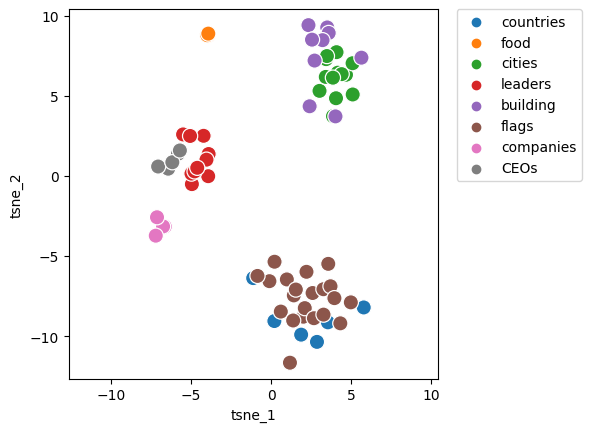

In [14]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



tsne = TSNE(n_components=2,  perplexity=20, n_iter=275, verbose=True, method='exact')
tsne_result = tsne.fit_transform(X)
tsne_result.shape
# (1000, 2)
# Two dimensions for each of our images
 
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-1, tsne_result.max()+1)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)